In [1]:
import numpy as np
import scipy
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.utils import np_utils
#from sklearn.cross_validation import StratifiedKFold

Using TensorFlow backend.


In [2]:
# Global Variables
windowSize = 5
numPCAcomponents = 30
testRatio = 0.25

# Load Training Dataset

In [3]:
X_train = np.load("./predata/XtrainWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio)  + ".npy")

y_train = np.load("./predata/ytrainWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio) + ".npy")
X_test = np.load("./predata/XtestWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio)  + ".npy")

y_test = np.load("./predata/ytestWindowSize" 
                  + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio) + ".npy")

In [4]:
# Reshape into (numberofsumples, channels, height, width)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[3], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[3], X_test.shape[1], X_test.shape[2]))

# convert class labels to on-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Define the input shape 
input_shape= X_train[0].shape
print(input_shape)

# number of filters
C1 = 3*numPCAcomponents

(30, 5, 5)


In [5]:
# Define the model
model = Sequential()

model.add(Conv2D(C1, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(3*C1, (3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(6*numPCAcomponents, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

In [6]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=25, min_lr=0.000001, verbose=1)
checkpointer = ModelCheckpoint(filepath="checkpoint.hdf5", verbose=1, save_best_only=False)
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=100, 
                    verbose=1, 
                    validation_data=(X_test, y_test),
                    callbacks=[reduce_lr, checkpointer],
                    shuffle=True)

Train on 20108 samples, validate on 5183 samples
Epoch 1/100
20108/20108 [==============================] - 5s 230us/step - loss: 1.3057 - acc: 0.6068 - val_loss: 0.5760 - val_acc: 0.8235

Epoch 00001: saving model to checkpoint.hdf5
Epoch 2/100
20108/20108 [==============================] - 3s 173us/step - loss: 0.3777 - acc: 0.8762 - val_loss: 0.3230 - val_acc: 0.9024

Epoch 00002: saving model to checkpoint.hdf5
Epoch 3/100
20108/20108 [==============================] - 3s 171us/step - loss: 0.2231 - acc: 0.9280 - val_loss: 0.2458 - val_acc: 0.9219

Epoch 00003: saving model to checkpoint.hdf5
Epoch 4/100
20108/20108 [==============================] - 4s 175us/step - loss: 0.1459 - acc: 0.9544 - val_loss: 0.1976 - val_acc: 0.9350

Epoch 00004: saving model to checkpoint.hdf5
Epoch 5/100
20108/20108 [==============================] - 3s 172us/step - loss: 0.1019 - acc: 0.9690 - val_loss: 0.1567 - val_acc: 0.9495

Epoch 00005: saving model to checkpoint.hdf5
Epoch 6/100
20108/20108 [=

20108/20108 [==============================] - 3s 169us/step - loss: 0.0031 - acc: 0.9995 - val_loss: 0.0888 - val_acc: 0.9765

Epoch 00044: saving model to checkpoint.hdf5
Epoch 45/100
20108/20108 [==============================] - 3s 170us/step - loss: 0.0028 - acc: 0.9997 - val_loss: 0.0872 - val_acc: 0.9767

Epoch 00045: saving model to checkpoint.hdf5
Epoch 46/100
20108/20108 [==============================] - 3s 171us/step - loss: 0.0029 - acc: 0.9996 - val_loss: 0.0897 - val_acc: 0.9757

Epoch 00046: saving model to checkpoint.hdf5
Epoch 47/100
20108/20108 [==============================] - 3s 170us/step - loss: 0.0036 - acc: 0.9993 - val_loss: 0.0882 - val_acc: 0.9765

Epoch 00047: saving model to checkpoint.hdf5
Epoch 48/100
20108/20108 [==============================] - 3s 170us/step - loss: 0.0027 - acc: 0.9998 - val_loss: 0.0884 - val_acc: 0.9757

Epoch 00048: saving model to checkpoint.hdf5
Epoch 49/100
20108/20108 [==============================] - 3s 171us/step - loss: 0

In [8]:
import h5py
from keras.models import load_model

In [9]:
model.save('./model/HSI_model_epochs100.h5')

In [10]:
from keras.utils import plot_model
plot_model(model, to_file='./model/model.png', show_shapes=True)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


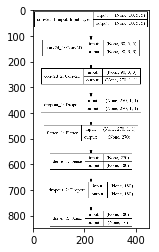

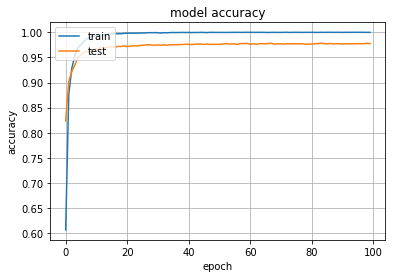

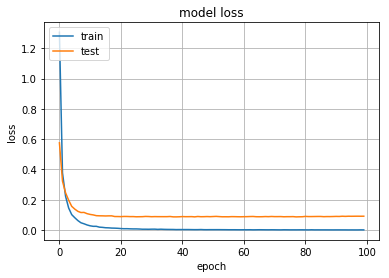

In [13]:
print(history.history.keys())
import matplotlib.pyplot as plt
%matplotlib inline
model_img = plt.imread('./model/model.png')
plt.imshow(model_img, shape=(452, 848))
plt.show()

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
# summarize history for loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left') 
plt.show()